## Observations and Insights

1)There is a strong relationship between tumor vol & the weight of each mouse
2)Capomulin & Ramicane are the most effective at reducing the size of tumors. 

## Dependencies and starter code

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from scipy.stats import linregress
import statistics
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mc_db = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mc_db.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## Summary statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mca_db = mc_db.copy()
mca_db = mca_db.groupby(['Drug Regimen'])
gd = mca_db.mean()['Tumor Volume (mm3)']
ge = mca_db.median()['Tumor Volume (mm3)']
gf = mca_db.var()['Tumor Volume (mm3)']
gg = mca_db.sem()['Tumor Volume (mm3)']
gx_db = pd.merge(gd, ge, how="left", on=["Drug Regimen"])
gy_db = pd.merge(gf, gg, how="left", on=["Drug Regimen"])
gxx = pd.merge(gx_db, gy_db, how="left", on=["Drug Regimen"])

gxx = gxx.rename(columns={"Tumor Volume (mm3)_x_x": "Mean Tumor Volume (mm3)", "Tumor Volume (mm3)_y_x": "Median Tumor Volume (mm3)","Tumor Volume (mm3)_x_y": "Variance Tumor Volume (mm3)","Tumor Volume (mm3)_y_y": "SEM Tumor Volume (mm3)"})
gxx.head(20)

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance Tumor Volume (mm3),SEM Tumor Volume (mm3)
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,0.329346
Ceftamin,52.591172,51.776157,39.290177,0.469821
Infubinol,52.884795,51.820584,43.128684,0.492236
Ketapril,55.235638,53.698743,68.553577,0.603860
Naftisol,54.331565,52.509285,66.173479,0.596466
Placebo,54.033581,52.288934,61.168083,0.581331
Propriva,52.322552,50.854632,42.351070,0.512884
Ramicane,40.216745,40.673236,23.486704,0.320955
Stelasyn,54.233149,52.431737,59.450562,0.573111


In [10]:
drug_count = len(combined_results_df["Drug Regimen"].unique())
drug_count

10

In [7]:

bar_title = "Data Points per Regimen"
x_label = "Drug Regimen"
y_label = "Data Points"

## Bar plots

[Text(0, 0.5, 'Data Points'), Text(0.5, 0, 'Drug Regimen')]

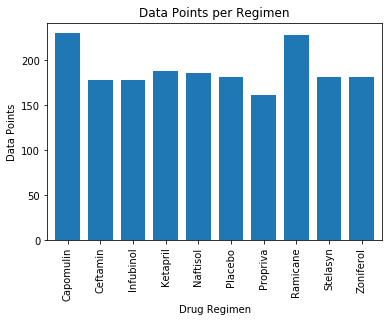

In [8]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
mca_db = mc_db.copy()
mca_db = mca_db.groupby(['Drug Regimen'])
datas = mca_db.count()

#let's just pick the first column, rename that and plot.
column_name = datas.columns[0]
datas = datas.rename(columns={column_name: 'Number of Data Points'})
ax = datas.plot.bar(y='Number of Data Points',title=bar_title,legend=False, width = 0.75)
ax.set(xlabel=x_label, ylabel=y_label)

Text(0, 0.5, 'Data Points')

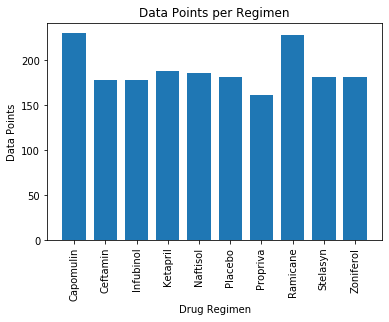

In [9]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = np.arange(len(datas.index))
tick_locations = [value for value in x_axis]
f, axe = plt.subplots()

axe.bar(x_axis, datas['Number of Data Points'], width = 0.75)
plt.xticks(tick_locations, datas.index, rotation="vertical")

axe.set_title(bar_title)
axe.set_xlabel(x_label)
axe.set_ylabel(y_label)

## Pie plots

[Text(0, 0.5, '')]

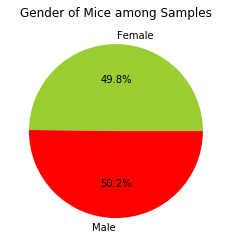

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_title = "Gender of Mice among Samples"
mcg_db = mouse_metadata.groupby(['Sex']) #
datas = mcg_db.count()

column_name = datas.columns[0]
datas = datas.rename(columns={column_name: 'Number of Data Points'})
ax = datas.plot.pie(y='Number of Data Points',autopct="%1.1f%%",title = pie_title, legend=False, colors = ["yellowgreen", "red"])
ax.set(ylabel="")


Text(0.5, 1.0, 'Gender of Mice among Samples')

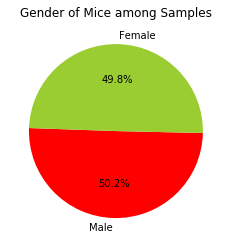

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male','Female']

# The values of each section of the pie chart
sizes = [datas.loc['Male']['Number of Data Points'], datas.loc['Female']['Number of Data Points']]

plt.pie(sizes, labels=labels, autopct="%1.1f%%",startangle=178, colors = ["red", "yellowgreen"])
plt.title(pie_title)

## Quartiles, outliers and boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
top_x = 4
mca_db = mc_db.copy()
mca_db = mca_db.groupby(['Drug Regimen','Timepoint'])
gd = mca_db.mean()

drugs = gd.index.levels[0]
timepoints = gd.index.levels[1]
end_size = []

for drug in drugs:
    end_size.append(gd.loc[drug,timepoints.max()]['Tumor Volume (mm3)'])

end = pd.DataFrame({"Size": end_size},index = drugs)
end = end.sort_values(by=['Size'])

most_promising =(end.index[0:top_x])
most_promising



Index(['Ramicane', 'Capomulin', 'Ceftamin', 'Infubinol'], dtype='object', name='Drug Regimen')

In [13]:

smax_db = study_results.copy()
smax_db.head()

del smax_db['Tumor Volume (mm3)']
del smax_db['Metastatic Sites']
smax_db = smax_db.groupby(['Mouse ID'])

#merge the mouse, and maximum time for each mouse with the original database.

cc_db = pd.merge(smax_db.max(), mc_db, how="left", on=["Mouse ID", "Timepoint"])
cc_db.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [14]:
gooddrugs = []
for drug in most_promising:
    gooddrugs.append(cc_db.loc[cc_db['Drug Regimen'] == drug]['Tumor Volume (mm3)'])

Ramicane
Lowerq 31.56046955
Mean 36.1913904284
Upperq 40.65900627
Outliers [43.04754260000001, 29.12847181, 22.05012627, 30.56462509, 31.09533505, 45.22086888, 43.41938077, 30.27623175, 40.66771292, 43.16637266, 44.18345092, 30.63869575]

Capomulin
Lowerq 32.37735684
Mean 36.6675677192
Upperq 40.1592203
Outliers [30.48598484, 47.68596303, 41.48300765, 28.43096411, 46.53920617, 41.58152074, 23.34359787, 40.72857787, 31.02392294, 40.65812366, 28.48403281, 31.896238399999998]

Ceftamin
Lowerq 48.72207785
Mean 57.7539768252
Upperq 64.29983003
Outliers [45.0, 47.784681799999994, 68.92318457, 67.74866174, 46.78453491, 45.0, 45.0, 67.52748237, 45.0, 64.63494887, 68.59474498, 64.72983655]

Infubinol
Lowerq 54.04860769
Mean 58.1782457852
Upperq 65.52574285
Outliers [67.97341878, 66.08306589, 72.2267309, 36.321345799999996, 67.28962147, 66.19691151, 47.01036401, 45.69933088, 46.25011212, 51.54243058, 50.00513807, 67.68556862]



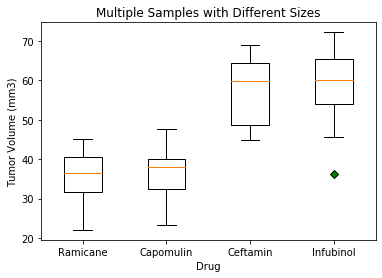

In [15]:
def outliers(series):
    quartiles = series.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    outlier = []
    for d in series:
        if (d < lowerq):
            outlier.append(d)
        if (d > upperq):
            outlier.append(d)
    
    print (f"Lowerq {lowerq}")
    print (f"Mean {statistics.mean(series)}")
    print (f"Upperq {upperq}")

    return outlier
    
    
i = 0;
for drugseries in gooddrugs:
    print (most_promising[i])
    print (f"Outliers {outliers(drugseries)}\n")
    i = i + 1

    
fig2, ax2 = plt.subplots()
ax2.set_title('Multiple Samples with Different Sizes')
ax2.set_ylabel('Tumor Volume (mm3)')
ax2.set_xlabel('Drug')

ax2.boxplot(gooddrugs, showfliers=True,flierprops=dict(markerfacecolor='g', marker='D'))
plt.xticks(np.arange(1, 5), most_promising)
plt.show()

## Line and scatter plots

Text(0.5, 1.0, 'Tumor Change for Mouse j119')

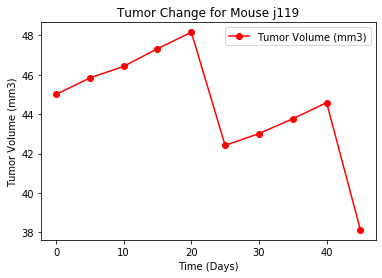

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mice = mc_db.loc[mc_db['Drug Regimen'] == "Capomulin"]
randomMouseID = mice.sample(1)['Mouse ID']
mouse = mice.loc[mice["Mouse ID"] == randomMouseID.values[0]]

fig33, ax33 = plt.subplots()

plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'], marker = 'o',color='red', label="Tumor Volume (mm3)")

plt.legend(loc="upper right")
ax33.set_ylabel('Tumor Volume (mm3)')
ax33.set_xlabel('Time (Days)')
labeltext = 'Tumor Change for Mouse '
labeltext += str(randomMouseID.values[0])
ax33.set_title(label=labeltext)

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mca_db = mc_db.copy()
capo = mca_db.loc[mca_db['Drug Regimen'] == "Capomulin"]
del capo['Metastatic Sites']
del capo['Age_months']
del capo['Timepoint']
del capo['Mouse ID']
del capo['Drug Regimen']
del capo['Sex']

capo = capo.groupby(['Weight (g)'])
capo = capo.mean()

capo = capo.reset_index()


The correlation between both factors is 0.95
y = 0.89x + 22.76


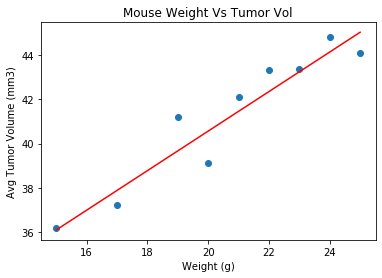

In [18]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = capo['Weight (g)']
y_values = capo['Tumor Volume (mm3)']
correlation = st.pearsonr(capo['Weight (g)'],capo['Tumor Volume (mm3)'])
print(f"The correlation between both factors is {round(correlation[0],2)}")


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print (line_eq)

capo['predict'] = 0.89 * capo['Weight (g)'] + 22.76


plt.scatter(capo['Weight (g)'],capo['Tumor Volume (mm3)'])
plt.plot(capo['Weight (g)'],capo['predict'],"r-")

plt.title("Mouse Weight Vs Tumor Vol")
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")

plt.show()